#   Instagram reach data analysis and Machine Learning

These days people use instagram in everyday activities to promote their business, post pictures, videos, build portfolio, blogging etc.
It has a wide audience with different niche, we might want to look at the data from our instagram account to draw inference from such data and also to prediction using machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
#check if dataset contain not null value
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [4]:
#So it has a null value in every column. we can delete the null values
data = data.dropna()

In [7]:
#providing us with information of our data and also the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


C:\Users\x\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


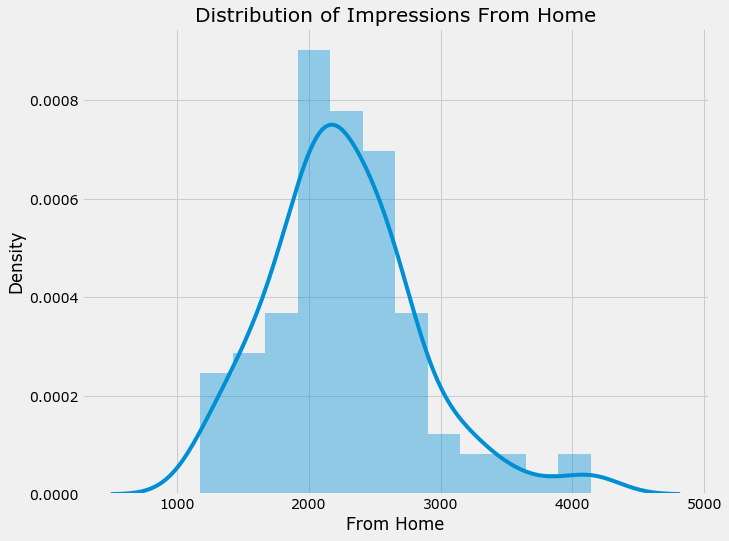

In [11]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

The impression from the home page on Instagram shows how farther reach my audience. Looking at the impressions from home, I can say it’sdifficult to reach every followers daily. Below is a distribution of the impressions I received from hashtags:

C:\Users\x\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


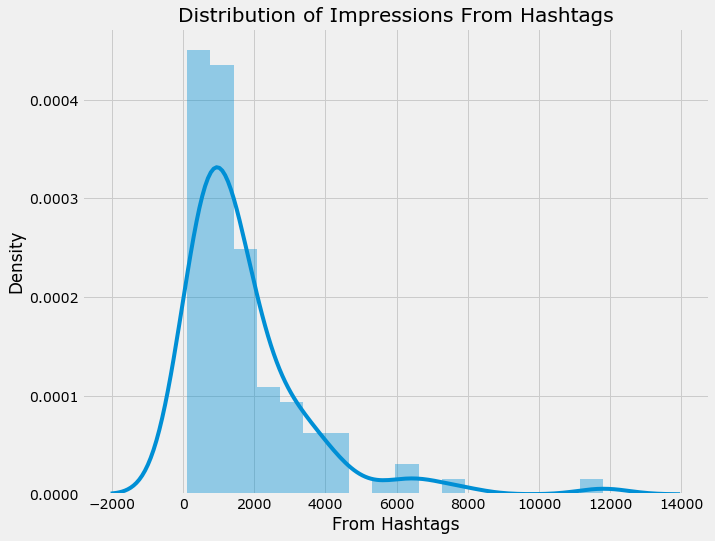

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Below plot: By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

C:\Users\x\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



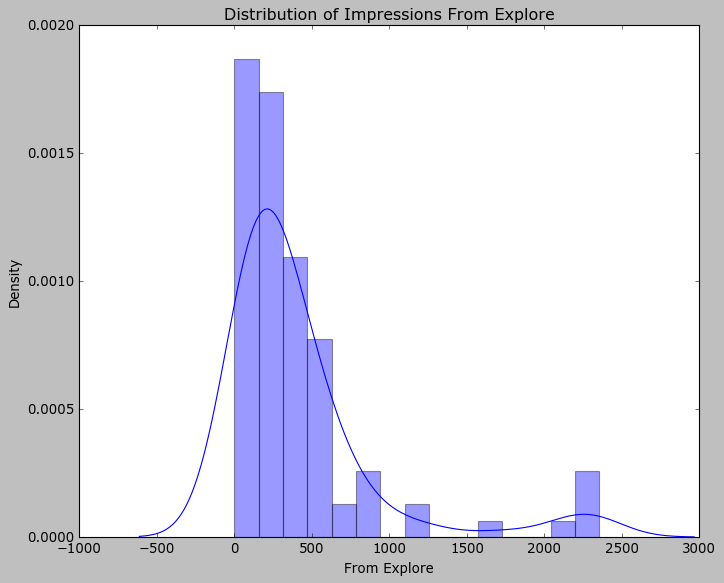

In [32]:
#similarly looking at the data from explore section

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [14]:
# percentage of impression from various sources

home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impression from Various Sources', hole=0.7)
fig.show()

From the visualization of the donut, we can conclude that half (50%) of the entire distribution audience is from home, followed by Hashtags (38%) and for the others too.

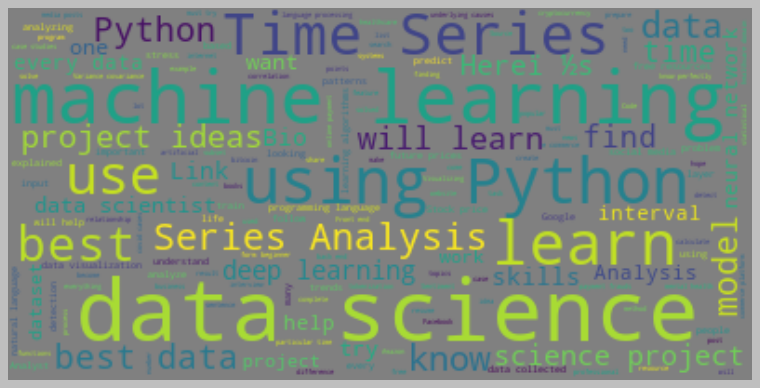

In [16]:
#Analysing the content, a focus on the hashtag and captions

text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="grey").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Creating a wordcloud of the hashtags column to look at the most used hashtags in the instagram post

In [19]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

Thus analysing the grack to bring out some important fators, The Graph above shows the relationship between the number of likes and the impression

There is a linear relationship between the number of likes and the reach on Instagram. Now let’s see the relationship between the number of comments and the number of impressions

In [20]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

Estimating the realationship between the number of impresssion and the number of shares, we can create a plot by visualizaing it below.

In [21]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Number of Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. lets examine the relationship between the number of saves and the number of impressions

In [22]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Our Saves Post and Number of Total Impressions")
figure.show()

In [ ]:
#let’s have a look at the correlation of all the columns with the Impressions column:

correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

### Observation

It is safe to say the more likes and shares gives us wider reach on instagram, however low number of shares will not affect our reach either.

In [23]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

# it is safe to say our conversion rate is 31%


31.17770767613039


In [27]:
#predicting the reach of our post using machine learning

x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# trainning our machine learning algorithm to predict our post

model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9107.5938101])

### Summary

That is how to analyse data and also predict the reach of our post and also train my model using machine learning to predict our instagram post reach.